<a href="https://colab.research.google.com/github/3x10e8/neurodynamics/blob/main/gating_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hodgkin-Huxley Model
The voltage across the cell membrane can change through:
$$C\frac{dV}{dt}=I_{Na}(V) + I_K(V) + I_L + I_{applied}$$
Where $I_{Na}$, $I_K$, and $I_L$ are _intrinsic_ currents, and $I_{applied}$ is _external_, which could be
- from the neuron's network, or
- applied externally during an experiment.

$I_{Na}$ and $I_K$ are ionic currents, whereas $I_L$ does not have a physiological motivation (although it isn't "wrong").

In the contemporary HH model, these currents take the form:
$$I_{Na} = (\color{orange}{E_{Na}} - V(t)) g_{Na} \color{cyan}{P_{Na}(V)}$$
where 
- $\color{orange}{E_{Na}}$ is the reversal potential,
- $(\color{orange}{E_{Na}} - V(t)) g_{Na}$ represents Ohm's Law of the GHK equation (?), and \\
- $\color{cyan}{P_{Na}(V)}$ is the permeability of the ion channel.

## Permeability 

The critical / brilliant guess of Hodgkin-Huxley is the form of $\color{cyan}{P_{Na}(V)}$:
$$ \color{cyan}{P_{Na}(V)} = \color{green}{m(t)}^{k_1}\ . \color{red}{h(t)}^{k_2}$$
where
- $\color{green}{m(t)}$ is related to the probability of _opening_ the channel,
- $\color{red}{h(t)}$ is associated with _closing_ the channel, and
- $k_1$ and $k_2$ are integers (determined from curve=fitting data)



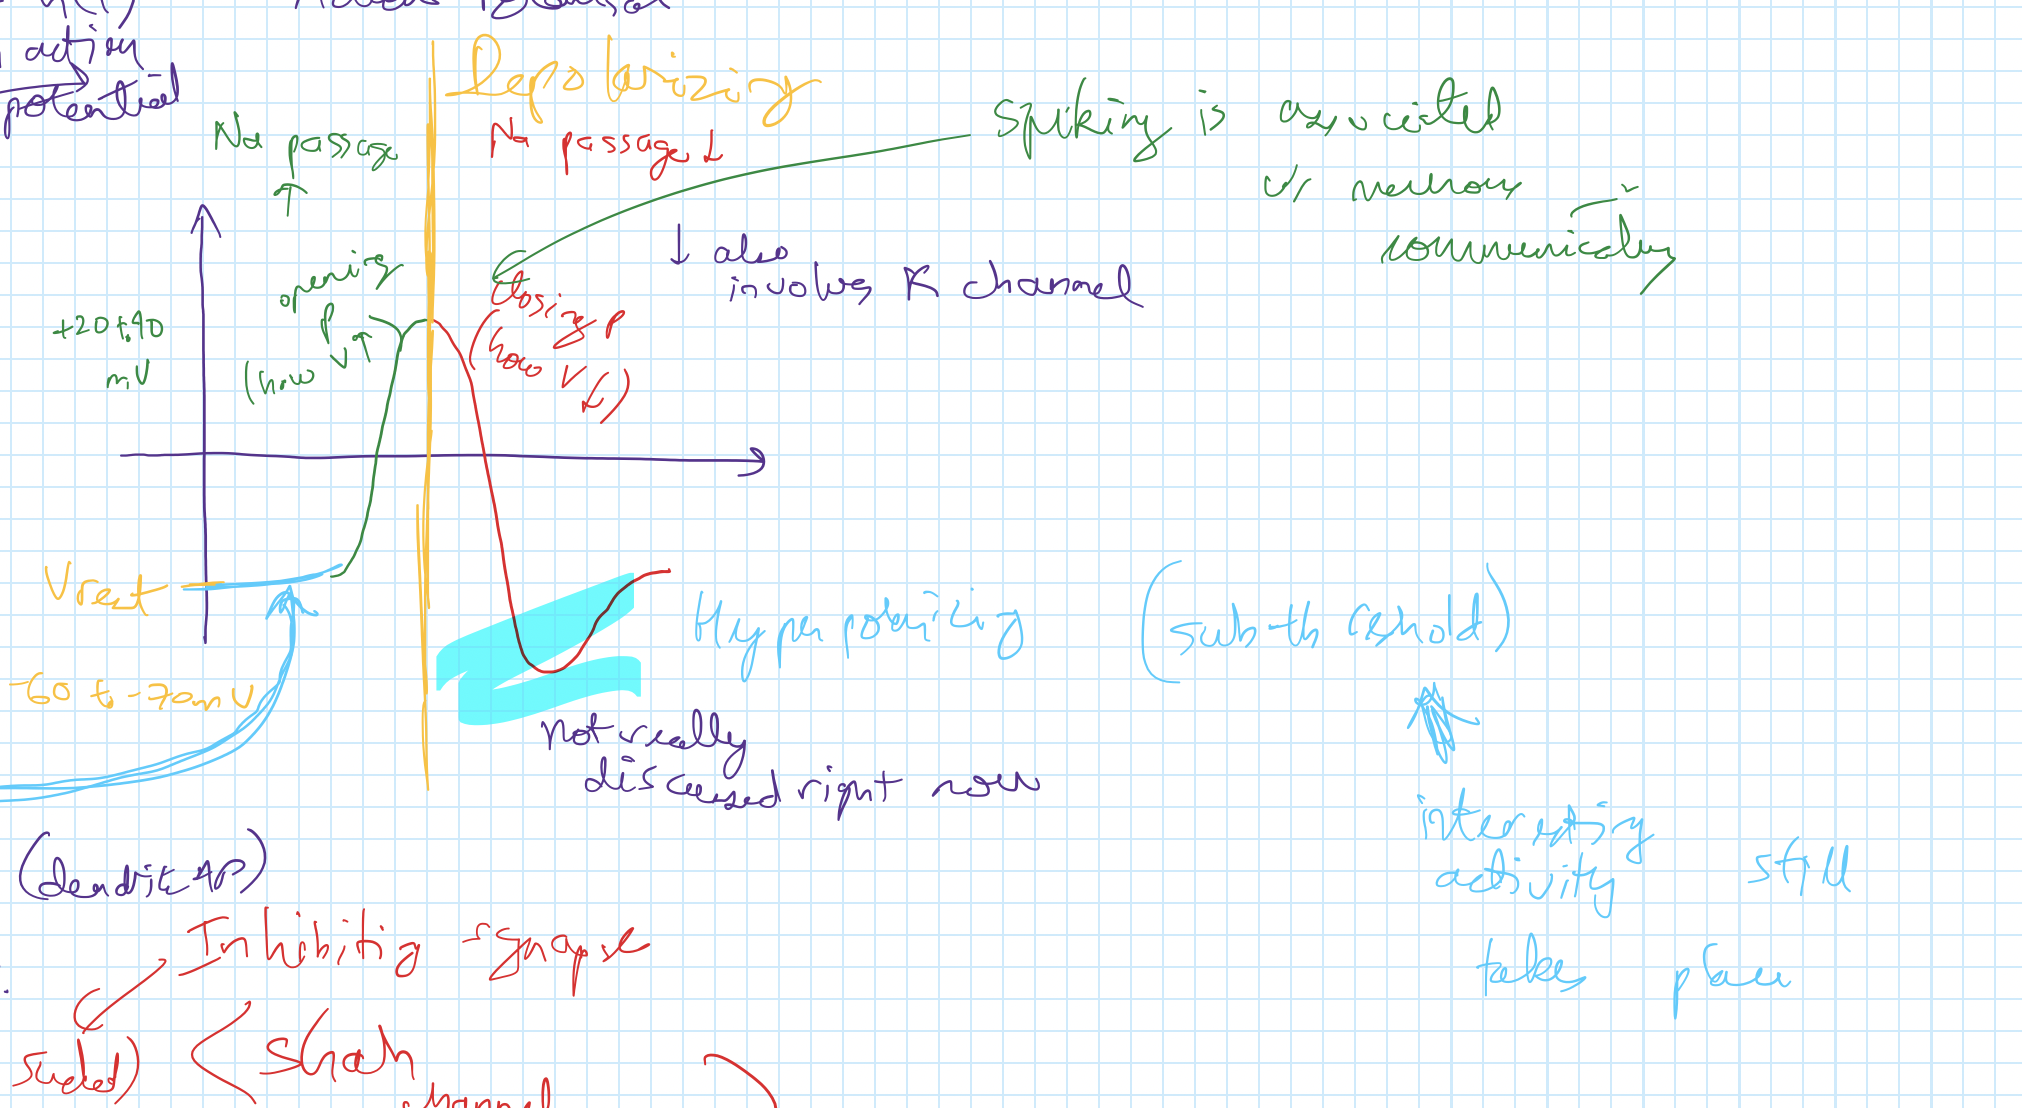

$\color{green}{m(t)}$, $\color{red}{h(t)}$ equations are guessed. This good guess is a first order kinetic equation:

$$\frac{d\color{green}{m(t)}}{dt} = \frac{\color{olive}{m_0(V(t))} - \color{green}{m(t)}}{τ_m}$$

Note: $m_0$ is also called $m_∞$.
$$\color{olive}{m_0(V)} = \frac{1}{2}\left[1+tanh\left( \frac{V-V_0}{dV_0} \right)\right]$$
$tanh$ varies between $(0, 1)$.

Also note: this isn't the only possible expression for $\color{olive}{m_0(V)}$. Biological literature uses:
$$\color{olive}{m_0(V)} = \frac{1}{1+e^{-\frac{V-V_0}{dV_0}}}$$


V(t)| $\color{olive}{m_0}$ | $\frac{d\color{green}{m}}{dt}$
---|---|---
$<0$ | 0 | $-\frac{m}{τ_m}$
$>V_0$ | 1 | $\frac{1-m}{τ_m}$

In [ ]:
from matplotlib.markers import MarkerStyle
from numpy import tanh
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt

@ipywidgets.interact(V0=(0, 5), dV0=(0, 5))
def m_plot(V0=5, dV0=1):
  V = np.arange(0, 10, 0.1)
  m0 = 0.5*(1+tanh((V-V0)/dV0))
  plt.plot(V, m0)
  plt.axvline(x=V0, c='r')
  plt.axvline(x=V0-dV0/2, c='r', ls=':')
  plt.axvline(x=V0+dV0/2, c='r', ls=':')
  plt.xlabel('$V$')
  plt.ylabel('$m_0$')
  plt.grid()
  plt.title('Effect of $V_0$ and $dV_0$ on $m_0$')

interactive(children=(IntSlider(value=5, description='V0', max=5), IntSlider(value=1, description='dV0', max=5…

Similarly, $\color{red}{h(t)}$ is of the form
$$\frac{d\color{red}{h(t)}}{dt} = \frac{\color{purple}{h_0(V(t))} - \color{red}{h(t)}}{τ_h}$$
where
$$\color{purple}{h_0(V)} = \frac{1}{2}\left[1-tanh\left( \frac{V-V_{0h}}{dV_{0h}} \right)\right] = \frac{1}{1+e^{+\frac{V-V_{0h}}{dV_{0h}}}}$$

V(t)| $\color{purple}{h_0}$ | $\frac{d\color{red}{h}}{dt}$
---|---|---
$<0$ | 1 | $\frac{1-h}{τ_h}$
$>V_0$ | 0 | $-\frac{h}{τ_h}$

In [ ]:
@ipywidgets.interact(V0=(0, 5), dV0=(0, 5))
def m_plot(V0h=5, dV0h=1):
  V = np.arange(0, 10, 0.1)
  m0 = 0.5*(1-tanh((V-V0h)/dV0h))
  plt.plot(V, m0)
  plt.axvline(x=V0h, c='r')
  plt.axvline(x=V0h-dV0h/2, c='r', ls=':')
  plt.axvline(x=V0h+dV0h/2, c='r', ls=':')
  plt.xlabel('$V$')
  plt.ylabel('$h_0$')
  plt.grid()
  plt.title('Effect of $V_{0h}$ and $dV_{0h}$ on $h_0$')

interactive(children=(IntSlider(value=5, description='V0h', max=15, min=-5), IntSlider(value=1, description='d…

## Experimental Findings
HH used chemicals to block the K channels.

$$\begin{align}
I_{Na} &= g_{Na} (\color{orange}{E_{Na}} - V(t)) \color{cyan}{P_{Na}(V)} \\
&= g_{Na} (\color{orange}{E_{Na}} - V(t))\ \color{green}{m(t)}^3\ . \color{red}{h(t)} 
\end{align}$$

Here, $g_{Na}$ can vary between neurons and even between species. Could use aggregated results from the sense lab database.

Similarly, they found:
$$\begin{align}
I_{K} &= g_{K} (\color{orange}{E_{K}} - V(t)) \color{cyan}{P_{K}(V)} \\
&= g_{K} (\color{orange}{E_{K}} - V(t))\ \color{red}{n(t)}^4 
\end{align}$$
where $\color{red}{n(t)}$ is an $\color{red}{h(t)}$-like closing variable.
$$\frac{d\color{red}{n(t)}}{dt} = \frac{\color{purple}{n_0(V(t))} - \color{red}{n(t)}}{τ_n(V)}$$

Finally, 
$$I_L = g_L(E_L - V)$$
where $E_L$ is a "fake" resting potential, and there are no gating variables.

## Calcium and Chloride Currents